In [53]:
'''server setup'''
import fastai
from fastai.vision import *
from fastai.callbacks import *
from fastai.utils.mem import *
from torchvision.models import vgg16_bn
import urllib.request
import os
# MODEL_URL: path to the export.pkl file
MODEL_URL = "https://www.dropbox.com/s/k3b83netns51si6/exportv1.pkl?dl=1"
urllib.request.urlretrieve(MODEL_URL, "exportv1.pkl")
# p = Path('../export.pkl')

KeyboardInterrupt: 

In [2]:
class FeatureLoss(nn.Module):
    def __init__(self, m_feat, layer_ids, layer_wgts):
        super().__init__()
        self.m_feat = m_feat
        self.loss_features = [self.m_feat[i] for i in layer_ids]
        self.hooks = hook_outputs(self.loss_features, detach=False)
        self.wgts = layer_wgts
        self.metric_names = ['pixel',] + [f'feat_{i}' for i in range(len(layer_ids))
              ] + [f'gram_{i}' for i in range(len(layer_ids))]

    def make_features(self, x, clone=False):
        self.m_feat(x)
        return [(o.clone() if clone else o) for o in self.hooks.stored]
    
    def forward(self, input, target):
        out_feat = self.make_features(target, clone=True)
        in_feat = self.make_features(input)
        self.feat_losses = [base_loss(input,target)]
        self.feat_losses += [base_loss(f_in, f_out)*w
                             for f_in, f_out, w in zip(in_feat, out_feat, self.wgts)]
        self.feat_losses += [base_loss(gram_matrix(f_in), gram_matrix(f_out))*w**2 * 5e3
                             for f_in, f_out, w in zip(in_feat, out_feat, self.wgts)]
        self.metrics = dict(zip(self.metric_names, self.feat_losses))
        return sum(self.feat_losses)
    
    def __del__(self): self.hooks.remove()
def getY(f):
    return path_hr/f.name
def get_data(bs,size):
    data = (src.label_from_func(getY)
           .transform(get_transforms(max_zoom=2.), size=size, tfm_y=True)
           .databunch(bs=bs).normalize(imagenet_stats, do_y=True))

    data.c = 3
    return data       

In [52]:
learner = load_learner(Path('./'), 'exportv1.pkl')

AttributeError: 'PosixPath' object has no attribute 'tell'

/home/davood/miniconda3/envs/fastai/lib/python3.6/site-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "


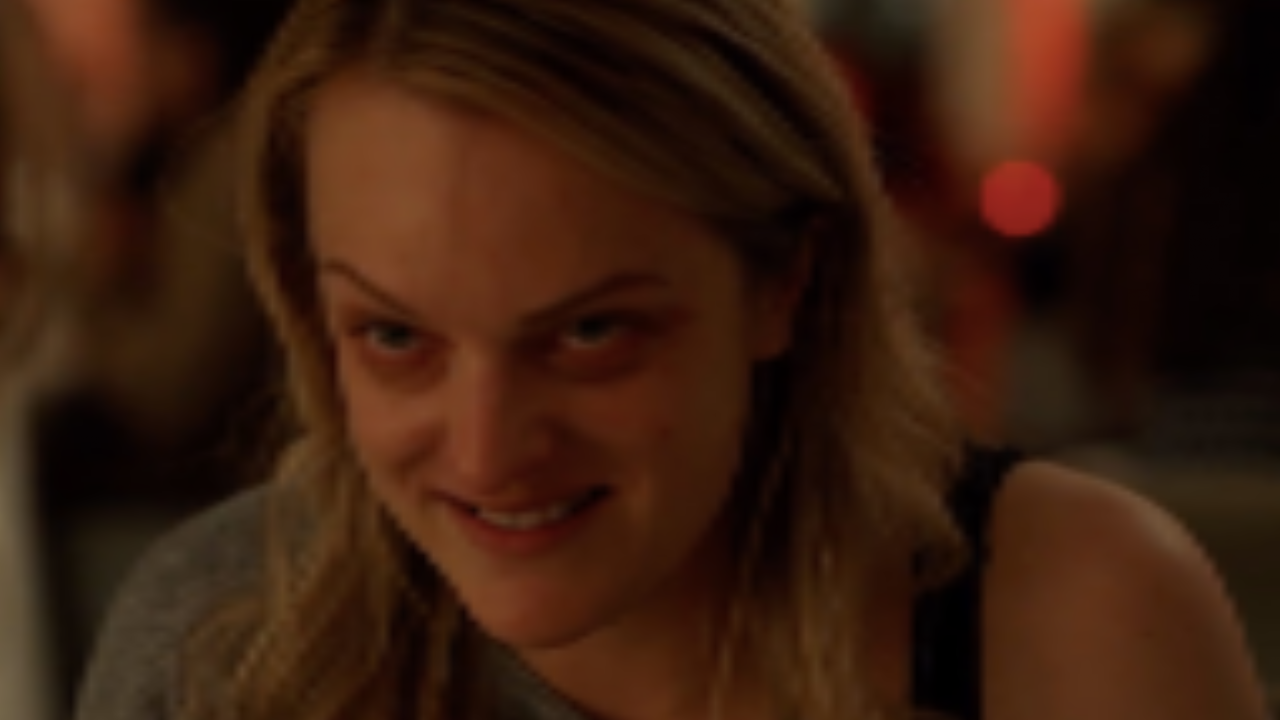

In [50]:
# inp = Path('../images_hr/00001.png')
inp = Path('./The-Invisible-Man-Screenshot-2-1280x720.jpg')
img = open_image(inp)
type(img)

# img = PILImage.create(inp)
sz = img.size
img = img.resize((3,128,128))
# img.resize(sz)

a, b, c = learner.predict((img))
# PILImage.create(a).resize(sz)


img.resize((3,*sz))

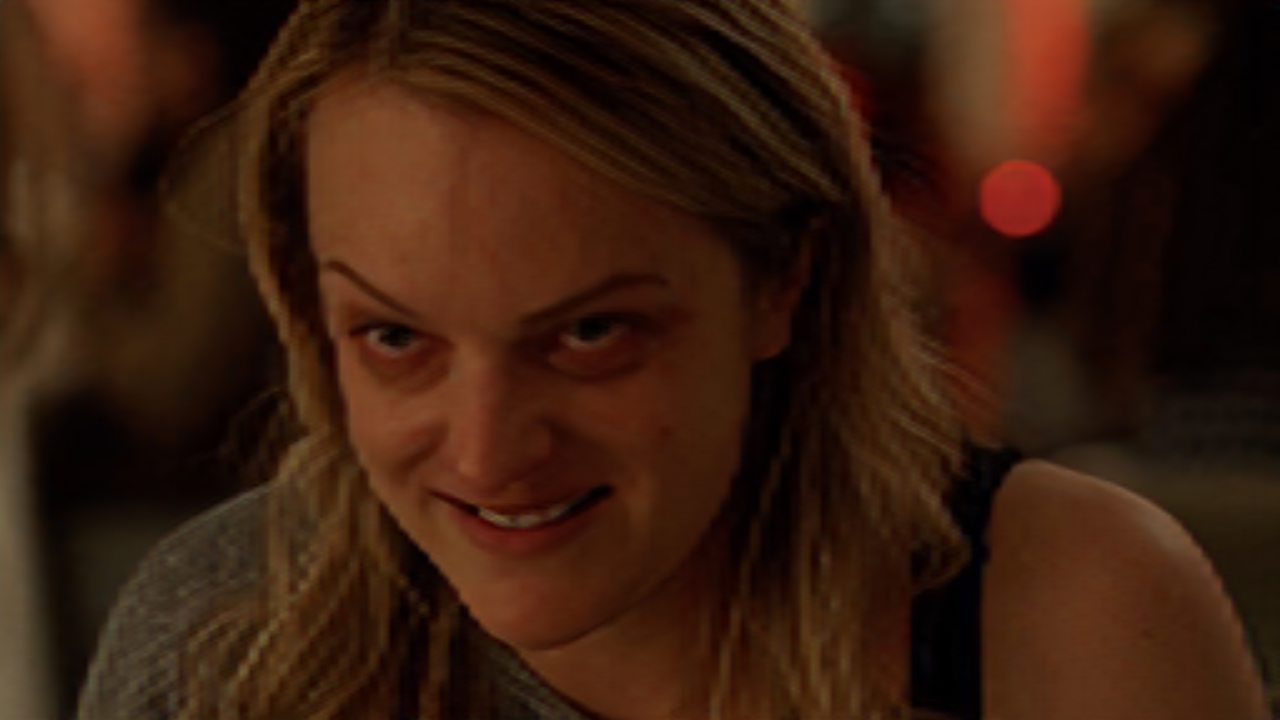

In [51]:
a.resize((3,*sz))

/home/davood/miniconda3/envs/fastai/lib/python3.6/site-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "


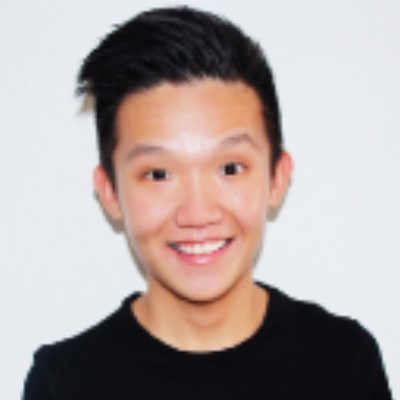

In [48]:
# inp = Path('../images_hr/00001.png')
inp = Path('./Shawn_Tok_Profile.jpg')
img = open_image(inp)
type(img)

# img = PILImage.create(inp)
sz = img.size
img = img.resize((3,128,128))
# img.resize(sz)

a, b, c = learner.predict((img))
# PILImage.create(a).resize(sz)


img.resize((3,*sz))

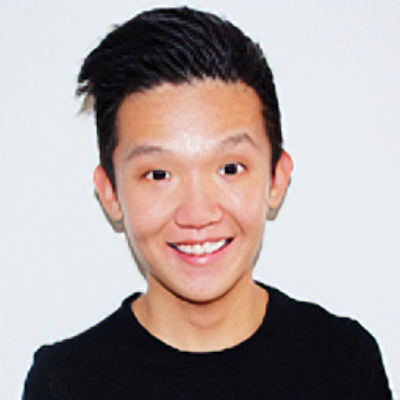

In [49]:
a.resize((3,*sz))